In [1]:
import numpy as np
import matplotlib.pyplot as plt
from csv import reader

# Read the csv file using genfromtxt
dataset3 = "Data/number-of-classes-and-class-size-by-level.csv"
dataset3_extract = np.genfromtxt(dataset3, dtype = ['i4', 'U80', 'U16', 'i8', 'f8'], delimiter = ',', names = True, missing_values=['_'], filling_values=0)
    
print(dataset3_extract)

[(1982, 'Primary', 'All', 8200, 35. )
 (1982, 'Primary', 'Primary 1', 1072, 36.9)
 (1982, 'Primary', 'Primary 2', 1137, 37.5)
 (1982, 'Primary', 'Primary 3', 1251, 37.3)
 (1982, 'Primary', 'Primary 4', 1457, 33.8)
 (1982, 'Primary', 'Primary 5', 1442, 33. )
 (1982, 'Primary', 'Primary 6', 1648, 33.8)
 (1982, 'Primary', 'Primary 7',  193, 27.5)
 (1982, 'Primary', 'Primary 8',    0,  0. )
 (1982, 'Secondary', 'All', 4851, 32.2)
 (1982, 'Secondary', 'Secondary 1', 1129, 34.5)
 (1982, 'Secondary', 'Secondary 2', 1272, 35.4)
 (1982, 'Secondary', 'Secondary 3', 1424, 26. )
 (1982, 'Secondary', 'Secondary 4', 1026, 34.5)
 (1982, 'Secondary', 'Secondary 5',    0,  0. )
 (1982, 'Pre-University', 'All',    0,  0. )
 (1982, 'Pre-University', 'PreU 1',    0,  0. )
 (1982, 'Pre-University', 'PreU 2',    0,  0. )
 (1982, 'Pre-University', 'PreU 3',    0,  0. )
 (1983, 'Primary', 'All', 8166, 35.6)
 (1983, 'Primary', 'Primary 1', 1094, 39.5)
 (1983, 'Primary', 'Primary 2', 1044, 38.3)
 (1983, 'Primar

In [2]:
# Text-Based Analysis
print("**Number of Classes and Class Sizes by Level of Education in Singapore from 1982 to 2020**")
years = np.unique(dataset3_extract['year'])
columnHeaders = dataset3_extract.dtype.names

print(f"\nThere are {len(dataset3_extract)} rows and {len(dataset3_extract[1])} columns in the data file {dataset3}")
print(f"\nThere are {years.size} years of data, from {years[0]} to {years[-1]}\n")

# Checking numeric and non-numeric fields
print("The names of the columns are:")
for i in range(len(columnHeaders)-1):
    print(f"- {columnHeaders[i]} {type(dataset3_extract[0][i])} isNumeric: {str(dataset3_extract[0][i]).isnumeric()}")

# Checking numeric or non-numeric field for float values (gross enrolment ratio)
classSizeNumericCheck = dataset3_extract['ave_class_size']
numericCheck = False
for i in classSizeNumericCheck:
    if np.isnan(i) == False:
        numericCheck = True
        
print(f"- {columnHeaders[4]} {type(dataset3_extract[0][4])} isNumeric: {numericCheck}")

print(f"\n{len(years)} unique values in years column\n{len(np.unique(dataset3_extract['level_of_education']))} unique values in level_of_education column\n{len(np.unique(dataset3_extract['level']))} unique values in level column\n{len(np.unique(dataset3_extract['no_of_classes']))} unique values in no_of_classes column\n{len(np.unique(dataset3_extract['ave_class_size']))} unique values in ave_class_size column")

# Maximum number of classes and average class size for that institution and year

# Primary Education (only p1 to p6)
primary_education = dataset3_extract[np.isin(dataset3_extract['level'], ['Primary 1', 'Primary 2', 'Primary 3', 
                                                                         'Primary 4', 'Primary 5', 'Primary 6'])]
primaryClassesNum = primary_education['no_of_classes']
primaryClassSize = primary_education['ave_class_size']

# Total Number of Classes from Primary 1 - 6
sumOfPrimaryClasses = np.split(np.array(primaryClassesNum),39)
sumPrimaryArr = []
for i in range(0, len(sumOfPrimaryClasses)):
    sumPrimaryArr.append(sumOfPrimaryClasses[i].sum())

# Average Class Sizes for Primary 1 - 6
avgSizePrimary = np.split(np.array(primaryClassSize), 39)
avgSizePrimaryArr = []
for i in range(0, len(avgSizePrimary)):
    avgSizePrimaryArr.append(avgSizePrimary[i].sum() / 6)

# Getting the index for the year with the largest number of classes from Primary 1 to Primary 6
max_class = 0
for i in range(0,len(sumPrimaryArr)):
    if sumPrimaryArr[i] > sumPrimaryArr[max_class]:
        max_class = i

max_classes = np.array(sumPrimaryArr).max()        
year_primary_maxclass = years[max_class]

# Getting the index for the year with the largest class size from Primary 1 to Primary 6
max_size = 0
for i in range(0,len(avgSizePrimaryArr)):
    if avgSizePrimaryArr[i] > avgSizePrimaryArr[max_size]:
        max_size = i
        
max_class_size = np.array(avgSizePrimaryArr).max()
year_primary_maxsize = years[max_size]

print(f"\nYear with the highest number of classes in Primary Education: {year_primary_maxclass}\nNumber of classes: {max_classes}\nYear with the highest average class size in Primary Education: {year_primary_maxsize}\nAverage class size: {max_class_size:.1f}")

# Secondary Education
education_secondary = dataset3_extract[np.isin(dataset3_extract['level_of_education'],['Secondary'])]
secondary_all_classes = education_secondary[np.isin(education_secondary['level'],['All'])]
max_classes = secondary_all_classes['no_of_classes'].max()
max_class_size = secondary_all_classes['ave_class_size'].max()

year_secondary_maxclass = secondary_all_classes['no_of_classes'].argmax()
year_secondary_maxclass = secondary_all_classes[year_secondary_maxclass]['year']

year_secondary_maxsize = secondary_all_classes['ave_class_size'].argmax()
year_secondary_maxsize = secondary_all_classes[year_secondary_maxsize]['year']

print(f"\nYear with the highest number of classes in Secondary Education: {year_secondary_maxclass}\nNumber of classes: {max_classes}\nYear with the highest average class size in Secondary Education: {year_secondary_maxsize}\nAverage class size: {max_class_size}")

# Pre-University Education
education_preU = dataset3_extract[np.isin(dataset3_extract['level_of_education'],['Pre-University'])]
preU_all_classes = education_preU[np.isin(education_preU['level'],['All'])]
max_classes = preU_all_classes['no_of_classes'].max()
max_class_size = preU_all_classes['ave_class_size'].max()

year_preU_maxclass = preU_all_classes['no_of_classes'].argmax()
year_preU_maxclass = preU_all_classes[year_preU_maxclass]['year']

year_preU_maxsize = preU_all_classes['ave_class_size'].argmax()
year_preU_maxsize = preU_all_classes[year_preU_maxsize]['year']

print(f"\nYear with the highest number of classes in Pre-University Education: {year_preU_maxclass}\nNumber of classes: {max_classes}\nYear with the highest average class size in Pre-University Education: {year_preU_maxsize}\nAverage class size: {max_class_size}")


**Number of Classes and Class Sizes by Level of Education in Singapore from 1982 to 2020**

There are 735 rows and 5 columns in the data file Data/number-of-classes-and-class-size-by-level.csv

There are 39 years of data, from 1982 to 2020

The names of the columns are:
- year <class 'numpy.int32'> isNumeric: True
- level_of_education <class 'numpy.str_'> isNumeric: False
- level <class 'numpy.str_'> isNumeric: False
- no_of_classes <class 'numpy.int64'> isNumeric: True
- ave_class_size <class 'numpy.float64'> isNumeric: True

39 unique values in years column
3 unique values in level_of_education column
19 unique values in level column
494 unique values in no_of_classes column
163 unique values in ave_class_size column

Year with the highest number of classes in Primary Education: 2007
Number of classes: 8247
Year with the highest average class size in Primary Education: 2003
Average class size: 37.8

Year with the highest number of classes in Secondary Education: 2009
Number of classe

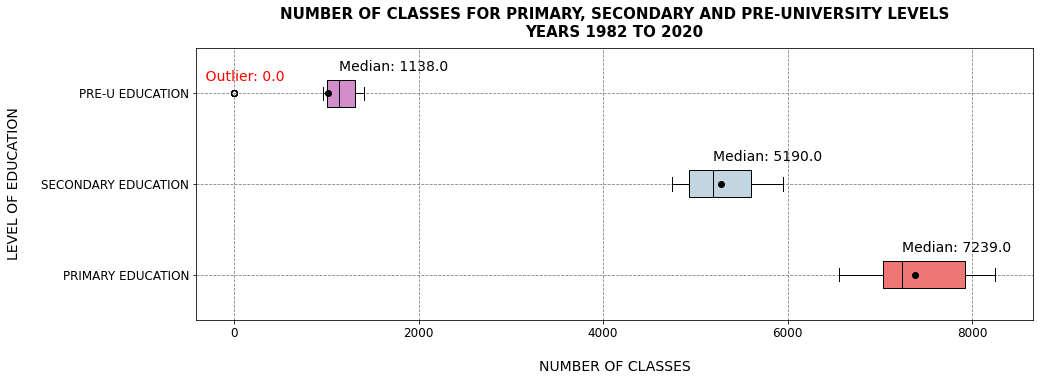

In [3]:
# Graph 1: Box Plot Diagram - Find the median and mean for number of classes for all levels combined

# Extract all the years from 1982 to 2020
data_year = dataset3_extract[np.isin(dataset3_extract['year'],[1982,1983,1984,1985,1986,1987,1988,1989,1990,
                                                               1991,1992,1993,1994,1995,1996,1997,1998,1999,
                                                               2000,2001,2002,2003,2004,2005,2006,2007,2008,
                                                               2009,2010,2011,2012,2013,2014,2015,2016,2017,
                                                               2018,2019,2020])]
data_educationlevel = data_year[np.isin(data_year['level'],['All'])]

# Number of classes for Primary Level
# Primary Education (only p1 to p6)
primary_education = dataset3_extract[np.isin(dataset3_extract['level'], ['Primary 1', 'Primary 2', 'Primary 3', 
                                                                         'Primary 4', 'Primary 5', 'Primary 6'])]
primaryClassesNum = primary_education['no_of_classes']

# Total Number of Classes from Primary 1 - 6
sumOfPrimaryClasses = np.split(np.array(primaryClassesNum),39)
no_of_primary_classes = []
for i in range(0, len(sumOfPrimaryClasses)):
    no_of_primary_classes.append(sumOfPrimaryClasses[i].sum())

# Number of classes for Secondary Level
data_secondary = data_educationlevel[np.isin(data_educationlevel['level_of_education'],['Secondary'])]
no_of_secondary_classes = data_secondary['no_of_classes']

# Number of classes for Pre-University Level
data_preU = data_educationlevel[np.isin(data_educationlevel['level_of_education'],['Pre-University'])]
no_of_preU_classes = data_preU['no_of_classes']

# Setting the labels and data for the boxplot
labels = np.array(['PRIMARY EDUCATION','SECONDARY EDUCATION','PRE-U EDUCATION'])
data = ([(no_of_primary_classes),(no_of_secondary_classes),(no_of_preU_classes)])

# Designing the mean value marker
meanpointprops = dict(marker='o', markeredgecolor='black', markerfacecolor='black')
# Plotting the BoxPlot Figure
plt.figure(figsize=(15,5))
bplot = plt.boxplot(data,labels=labels, vert=False, patch_artist=True, showmeans=True, meanprops = meanpointprops)

# Setting the colors for the boxplots
bplot['boxes'][0].set_facecolor('#EE7674')
bplot['boxes'][1].set_facecolor('#C2D6E1')
bplot['boxes'][2].set_facecolor('#D28ECA')

# Calculating and displaying the median value for each boxplot
for median in bplot['medians']:
    median.set_color('black')
    
for line in bplot['medians']:
    # get position data for top of median line
    x, y = line.get_xydata()[1]
    # overlay median value based on position value x,y
    plt.text(x, y+0.1, f'Median: {x:.1f}', fontsize=14)

# Displaying the outlier value for the boxplots
fliers = []
for line in bplot['fliers']:
    ndarray = line.get_xydata()
    if (len(ndarray)>0): # will be 0 when no fliers
        max_flier = ndarray[:,0].max()
        max_flier_index = ndarray[:,0].argmax()
        x = ndarray[max_flier_index,0] # flier text in x position
        y = ndarray[max_flier_index,1] # flier text in y position  
        
plt.text(x,y+0.14,f'     Outlier: {max_flier}', horizontalalignment='center',fontsize=14, color='r')

# Adding grids for boxplot
plt.grid(c='gray', linestyle='--')

# Add title and axis labels
plt.title("NUMBER OF CLASSES FOR PRIMARY, SECONDARY AND PRE-UNIVERSITY LEVELS\nYEARS 1982 TO 2020", y=1.02, 
          fontsize=15, fontweight='bold')

plt.xlabel("NUMBER OF CLASSES", fontsize=14, labelpad=20)
plt.xticks(fontsize=12)

plt.ylabel("LEVEL OF EDUCATION", fontsize=14, labelpad=20)
plt.yticks(fontsize=12)
plt.rcParams['font.family'] = ['century gothic']

plt.show()